In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from matplotlib.lines import Line2D 
from scipy.stats import norm

## read data

In [21]:
df_list = []
for i in range(9):
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results/rbf/sim_par_'+str(i+1)+'_'+j+'_25_09_26.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Gaussian'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
    for j in ['025', '075']:
        df_tmp = pd.read_csv('results/laplacian/sim_par_'+str(i+1)+'_'+j+'_25_09_26.csv')
        if i < 3:
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target, n_source=300'
        if i >= 3 and i < 6: 
            df_tmp['x'] = df_tmp['n_target']
            df_tmp['x_name'] = 'n_target=n_source'
        if i >= 6 and i < 9: 
            df_tmp['x'] = df_tmp['n_plus'] + df_tmp['n_minus']
            df_tmp['x_name'] = 'n_source, n_target=300'
        df_tmp['p'] = 5
        df_tmp['distributions'] = 'Gaussian'
        df_tmp['method_name'] = df_tmp['estimator']+'_'+df_tmp['type']+'_'+df_tmp['gamma_selection_name']+'_'+df_tmp['kernel']
        df_tmp.pop('estimator_name')
        df_tmp['MSE'] = (df_tmp['pi'] - df_tmp['pi_target'])**2
        df_list.append(df_tmp)
    
df = pd.concat(df_list, ignore_index=True)
df["method_name"] = df["method_name"].astype(str).str.strip()


In [22]:
sim_params_colnames = ['sim_scenario', 'n_plus', 'n_minus', 'n_target', 'pi_target', 
                       'gamma_selection_name', 'estimator', 'type', 'kernel',
                        'x', 'x_name', 'p', 'distributions', 'method_name']
values_colnames = ['pi', 'var_n', 'var', 'gamma', 'MSE', 'time']

In [23]:
df = df.drop_duplicates(sim_params_colnames+['seed'], keep='last')

In [24]:
df_tmp = df.groupby(sim_params_colnames).count()['pi'].reset_index()

In [30]:
df_tmp[(df_tmp['kernel'] == 'rbf') & (df_tmp['type'] == 'V')].groupby('sim_scenario').count()['pi'].reset_index()

,sim_scenario,pi
0,sim_par_1,98
1,sim_par_2,98
2,sim_par_3,98
3,sim_par_4,70
4,sim_par_5,70
5,sim_par_6,70
6,sim_par_7,70
7,sim_par_8,70
8,sim_par_9,70


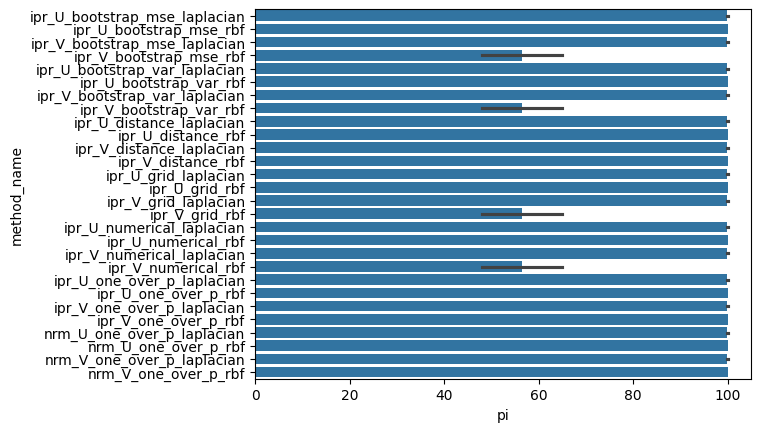

In [25]:
sns.barplot(df.groupby(sim_params_colnames).count()['pi'].reset_index(), x='pi', y='method_name')
plt.show()

In [120]:
df = df[sim_params_colnames+values_colnames]

In [121]:
df_mse = copy.copy(df)
df_mse = df_mse[df_mse.columns[:14].tolist()+['MSE']].groupby(df_mse.columns[:14].tolist()).agg('mean').reset_index()


In [122]:
df_mse = df_mse.sort_values(by=["pi_target", "sim_scenario"])
df_mse['facet_blocks'] = df_mse['sim_scenario'] + ", pi_target = " + df_mse['pi_target'].astype(str)

In [123]:
def plot_mse(df_mse, UorV=['U'], kernel=['rbf'], estimator=['ipr', 'nrm'], col="facet_blocks", col_wrap=3):
    g = sns.catplot(data=df_mse[(df_mse['kernel'].isin(kernel)) & (df_mse['type'].isin(UorV)) & (df_mse['estimator'].isin(estimator))],
        x="x",   
        y="MSE", 
        hue="method_name",
        palette='tab20', 
        col=col, 
        kind="bar",
        height=4,
        aspect=1.2,
        sharey=False,
        sharex=False,
        col_wrap=col_wrap
    )
    g.set_titles("{col_name}")
    plt.show()

# RESULTS

## Figure 1

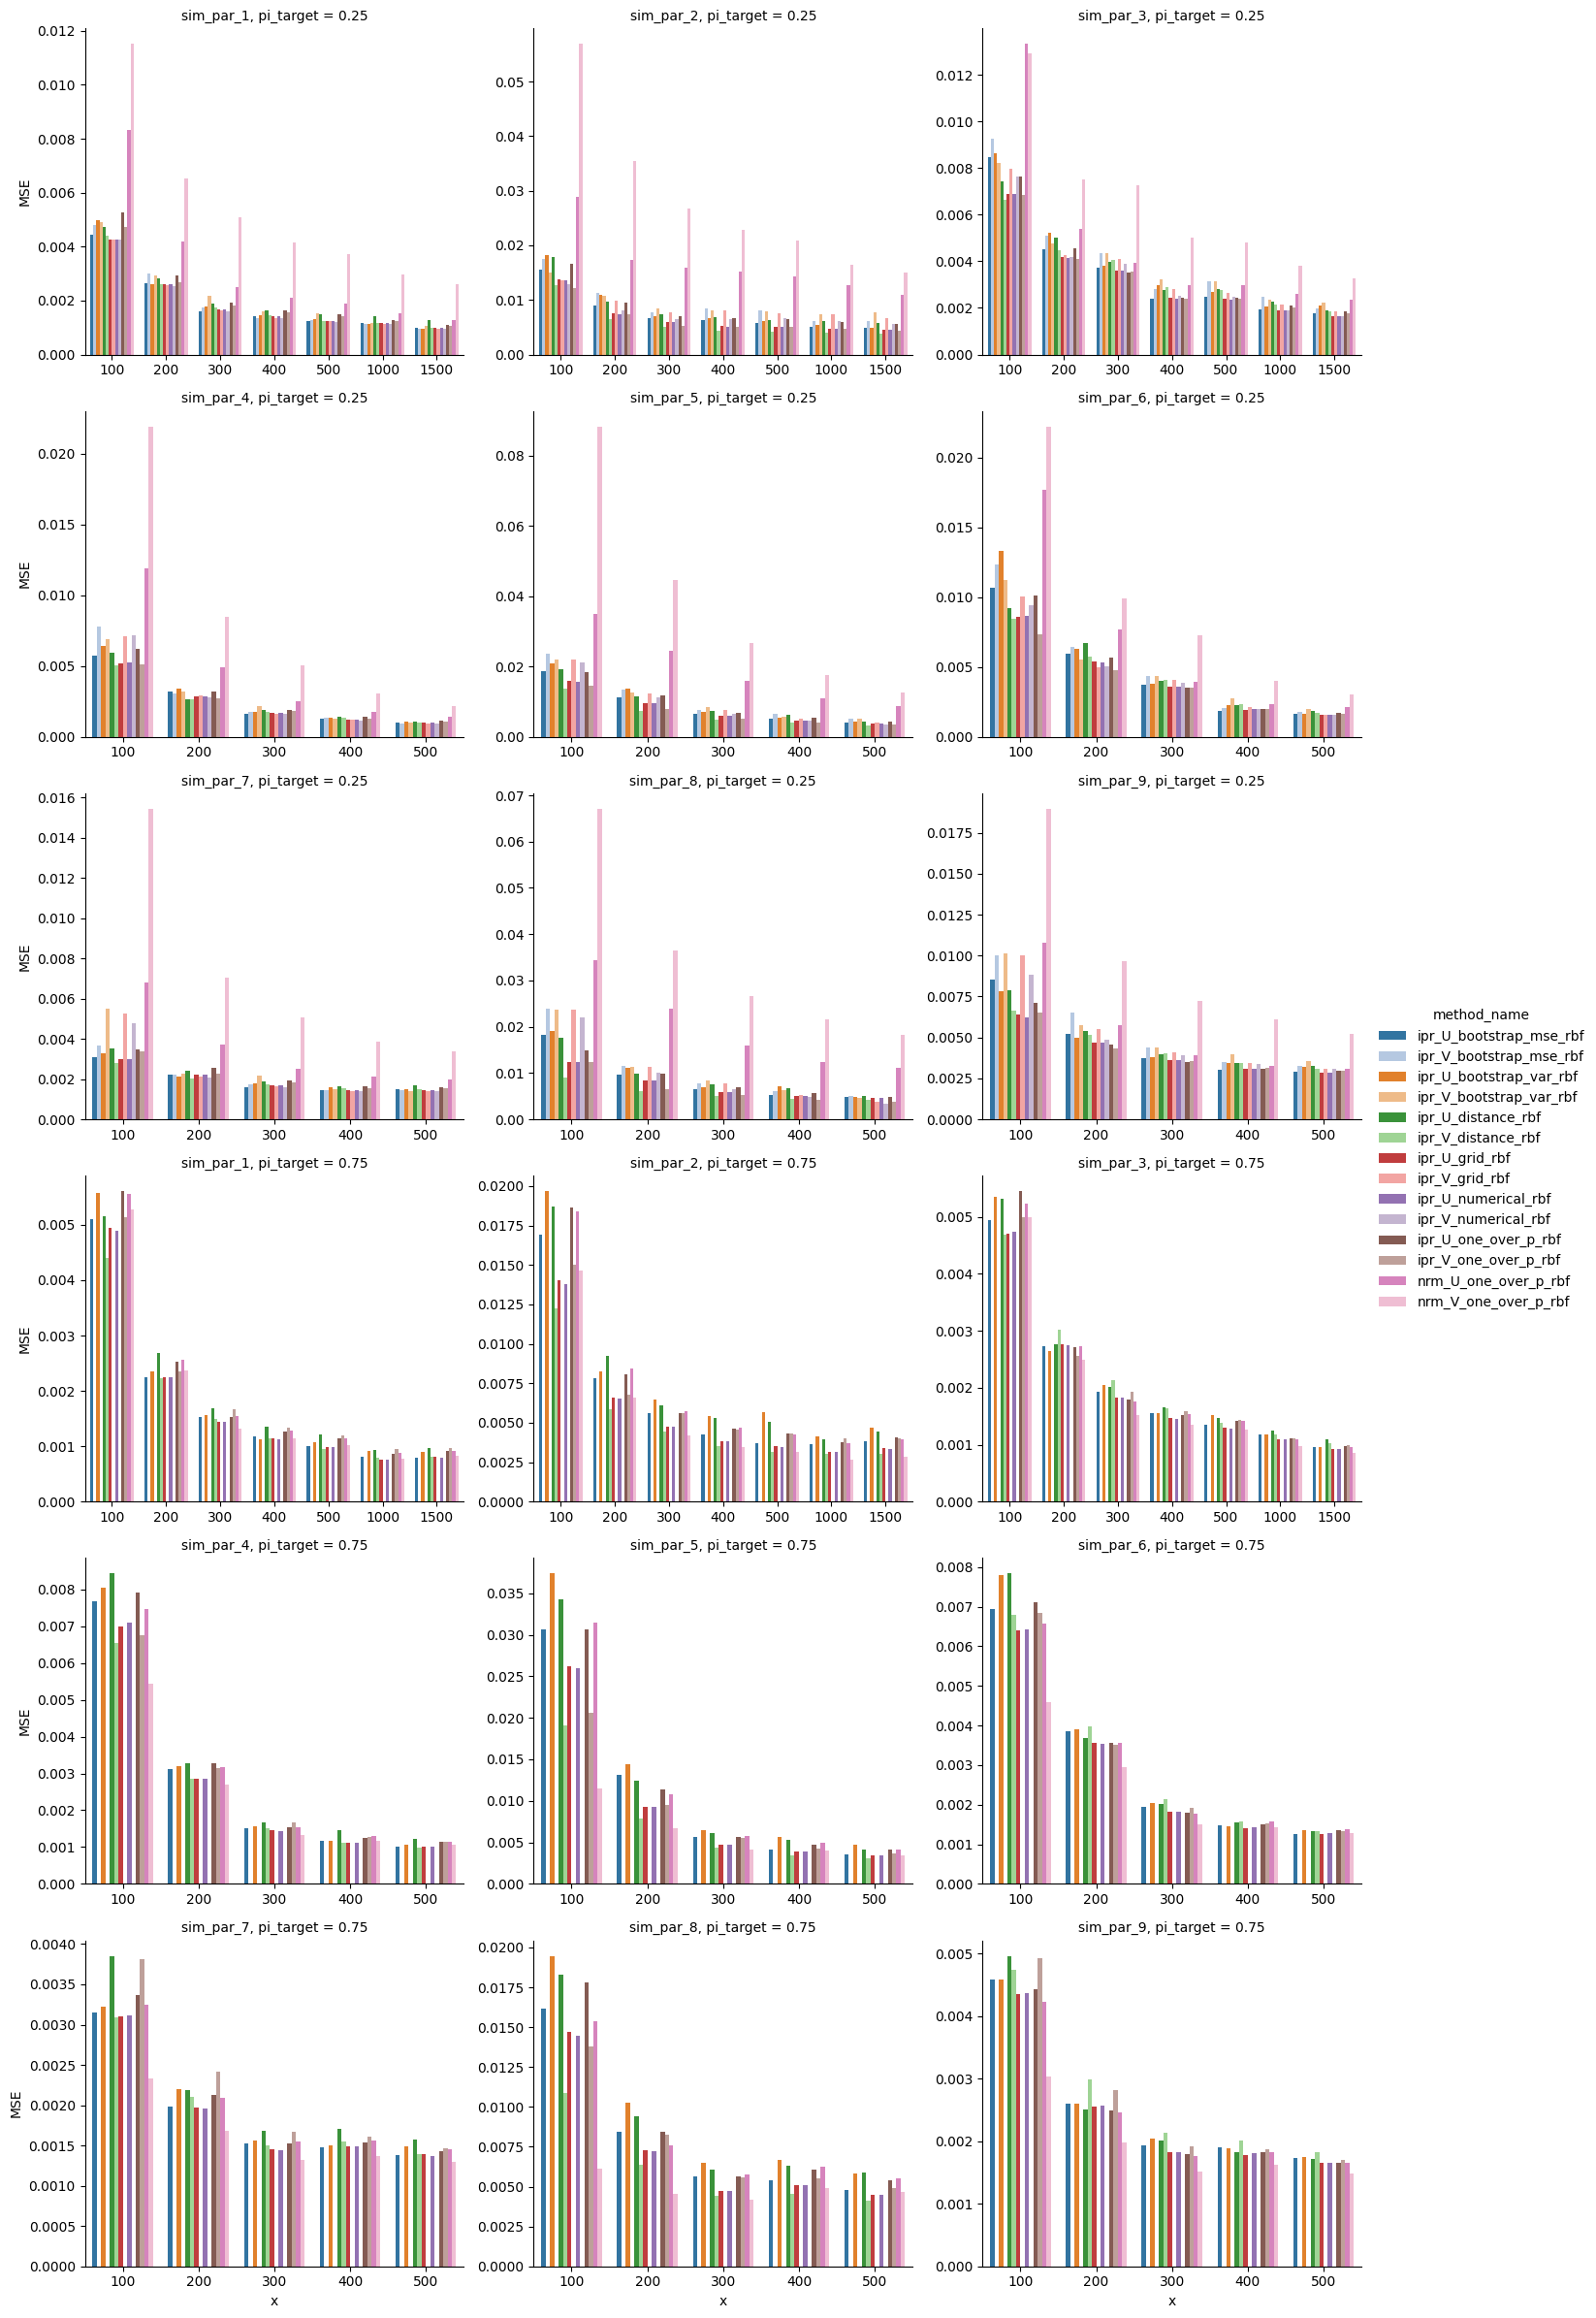

In [72]:
plot_mse(df_mse, ['U', 'V'], ['rbf'], ['ipr', 'nrm'])

## Figure 2

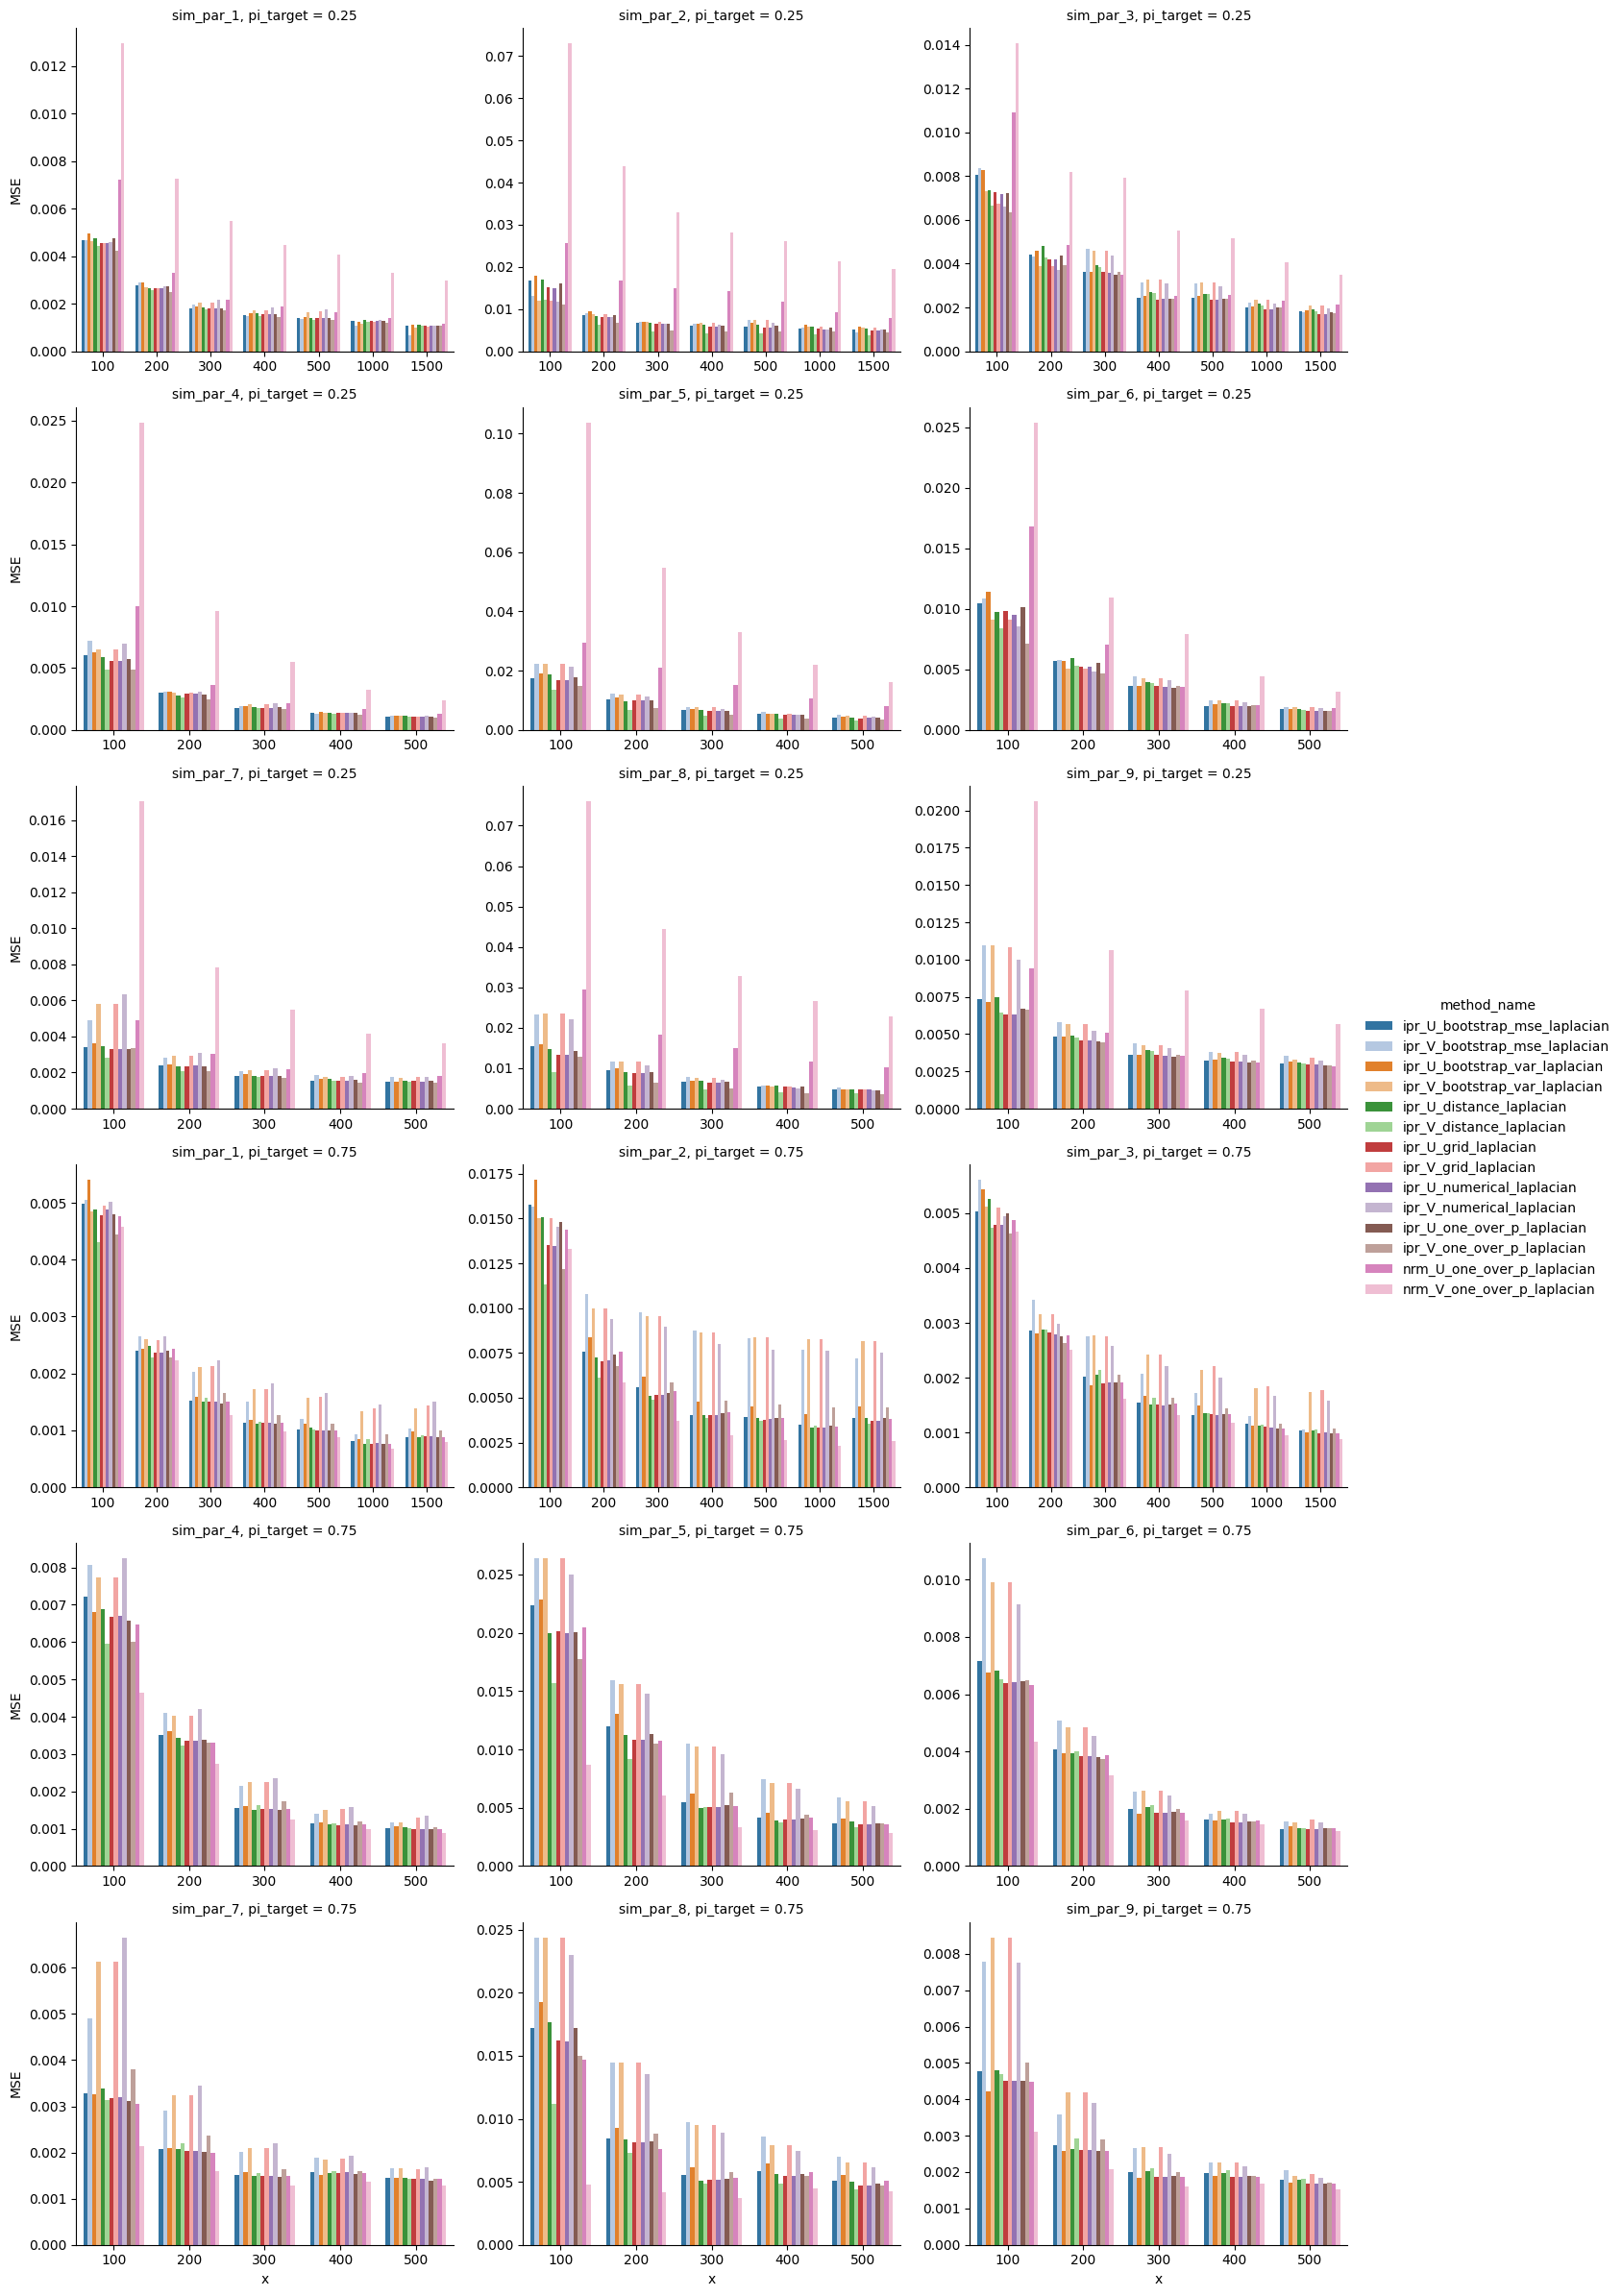

In [73]:
plot_mse(df_mse, ['U', 'V'], ['laplacian'], ['ipr', 'nrm'])

## Figure 3

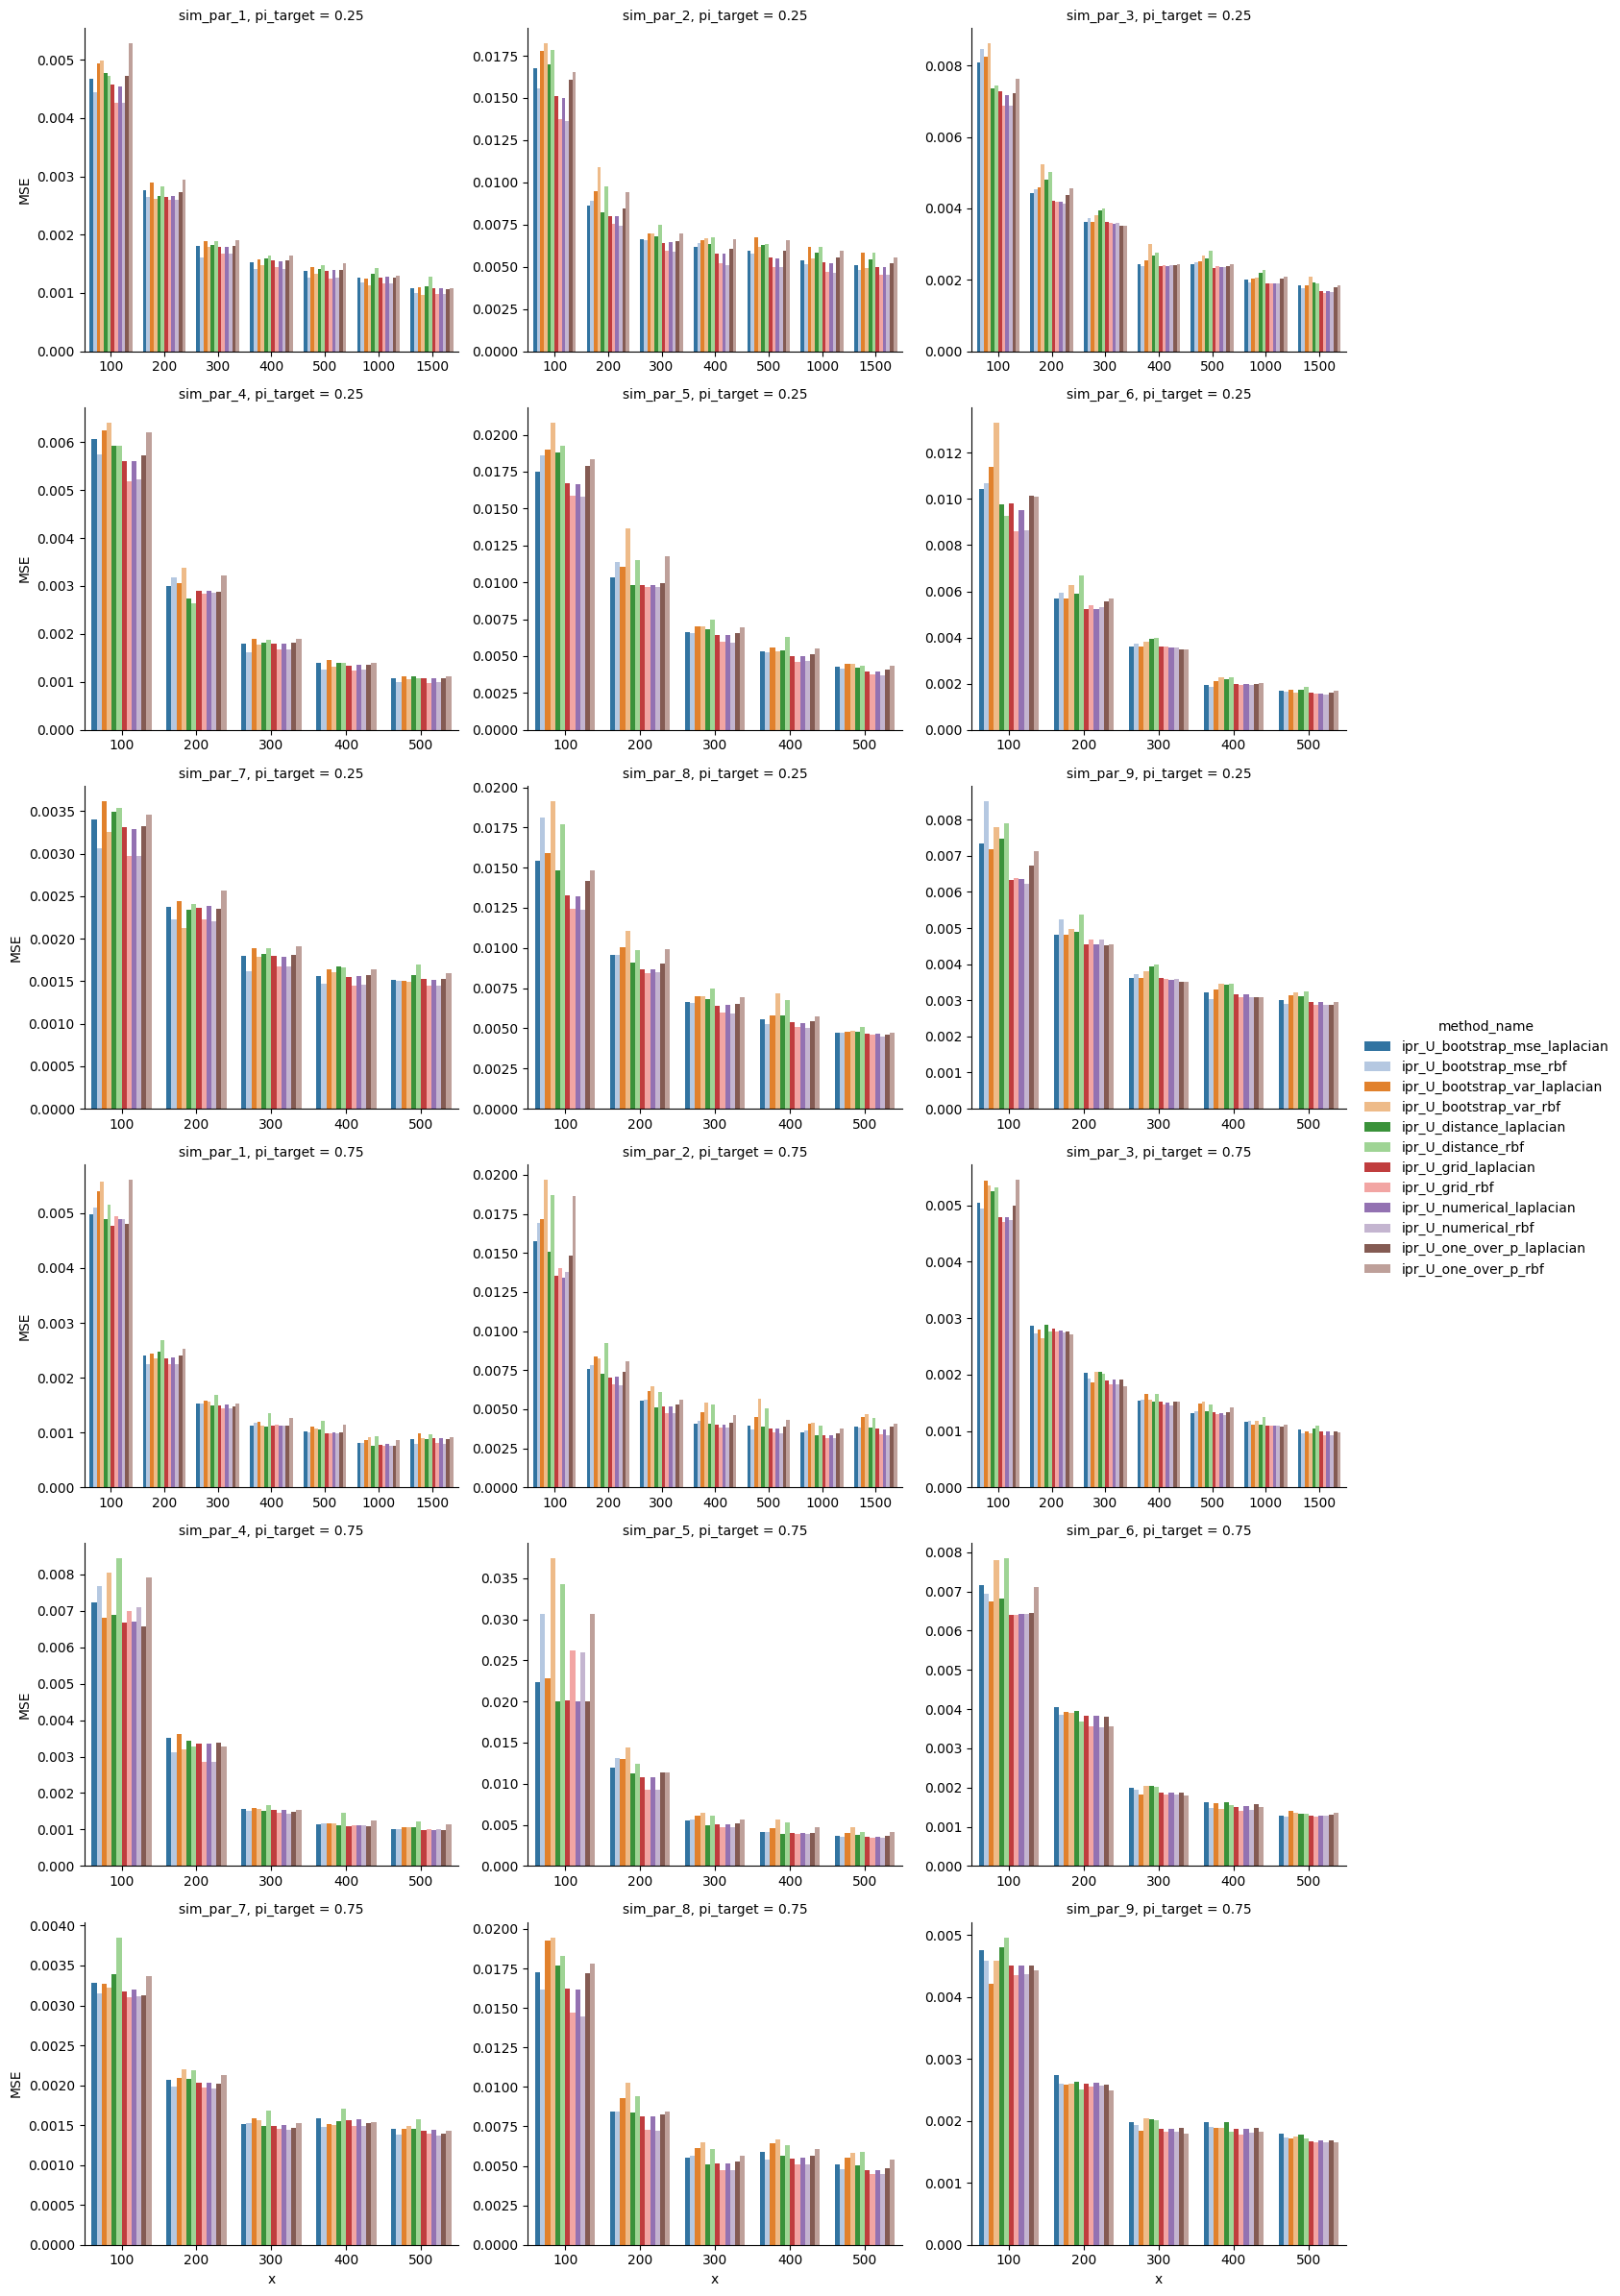

In [74]:
plot_mse(df_mse, ['U'], ['rbf', 'laplacian'], ['ipr'])

## Figure 4

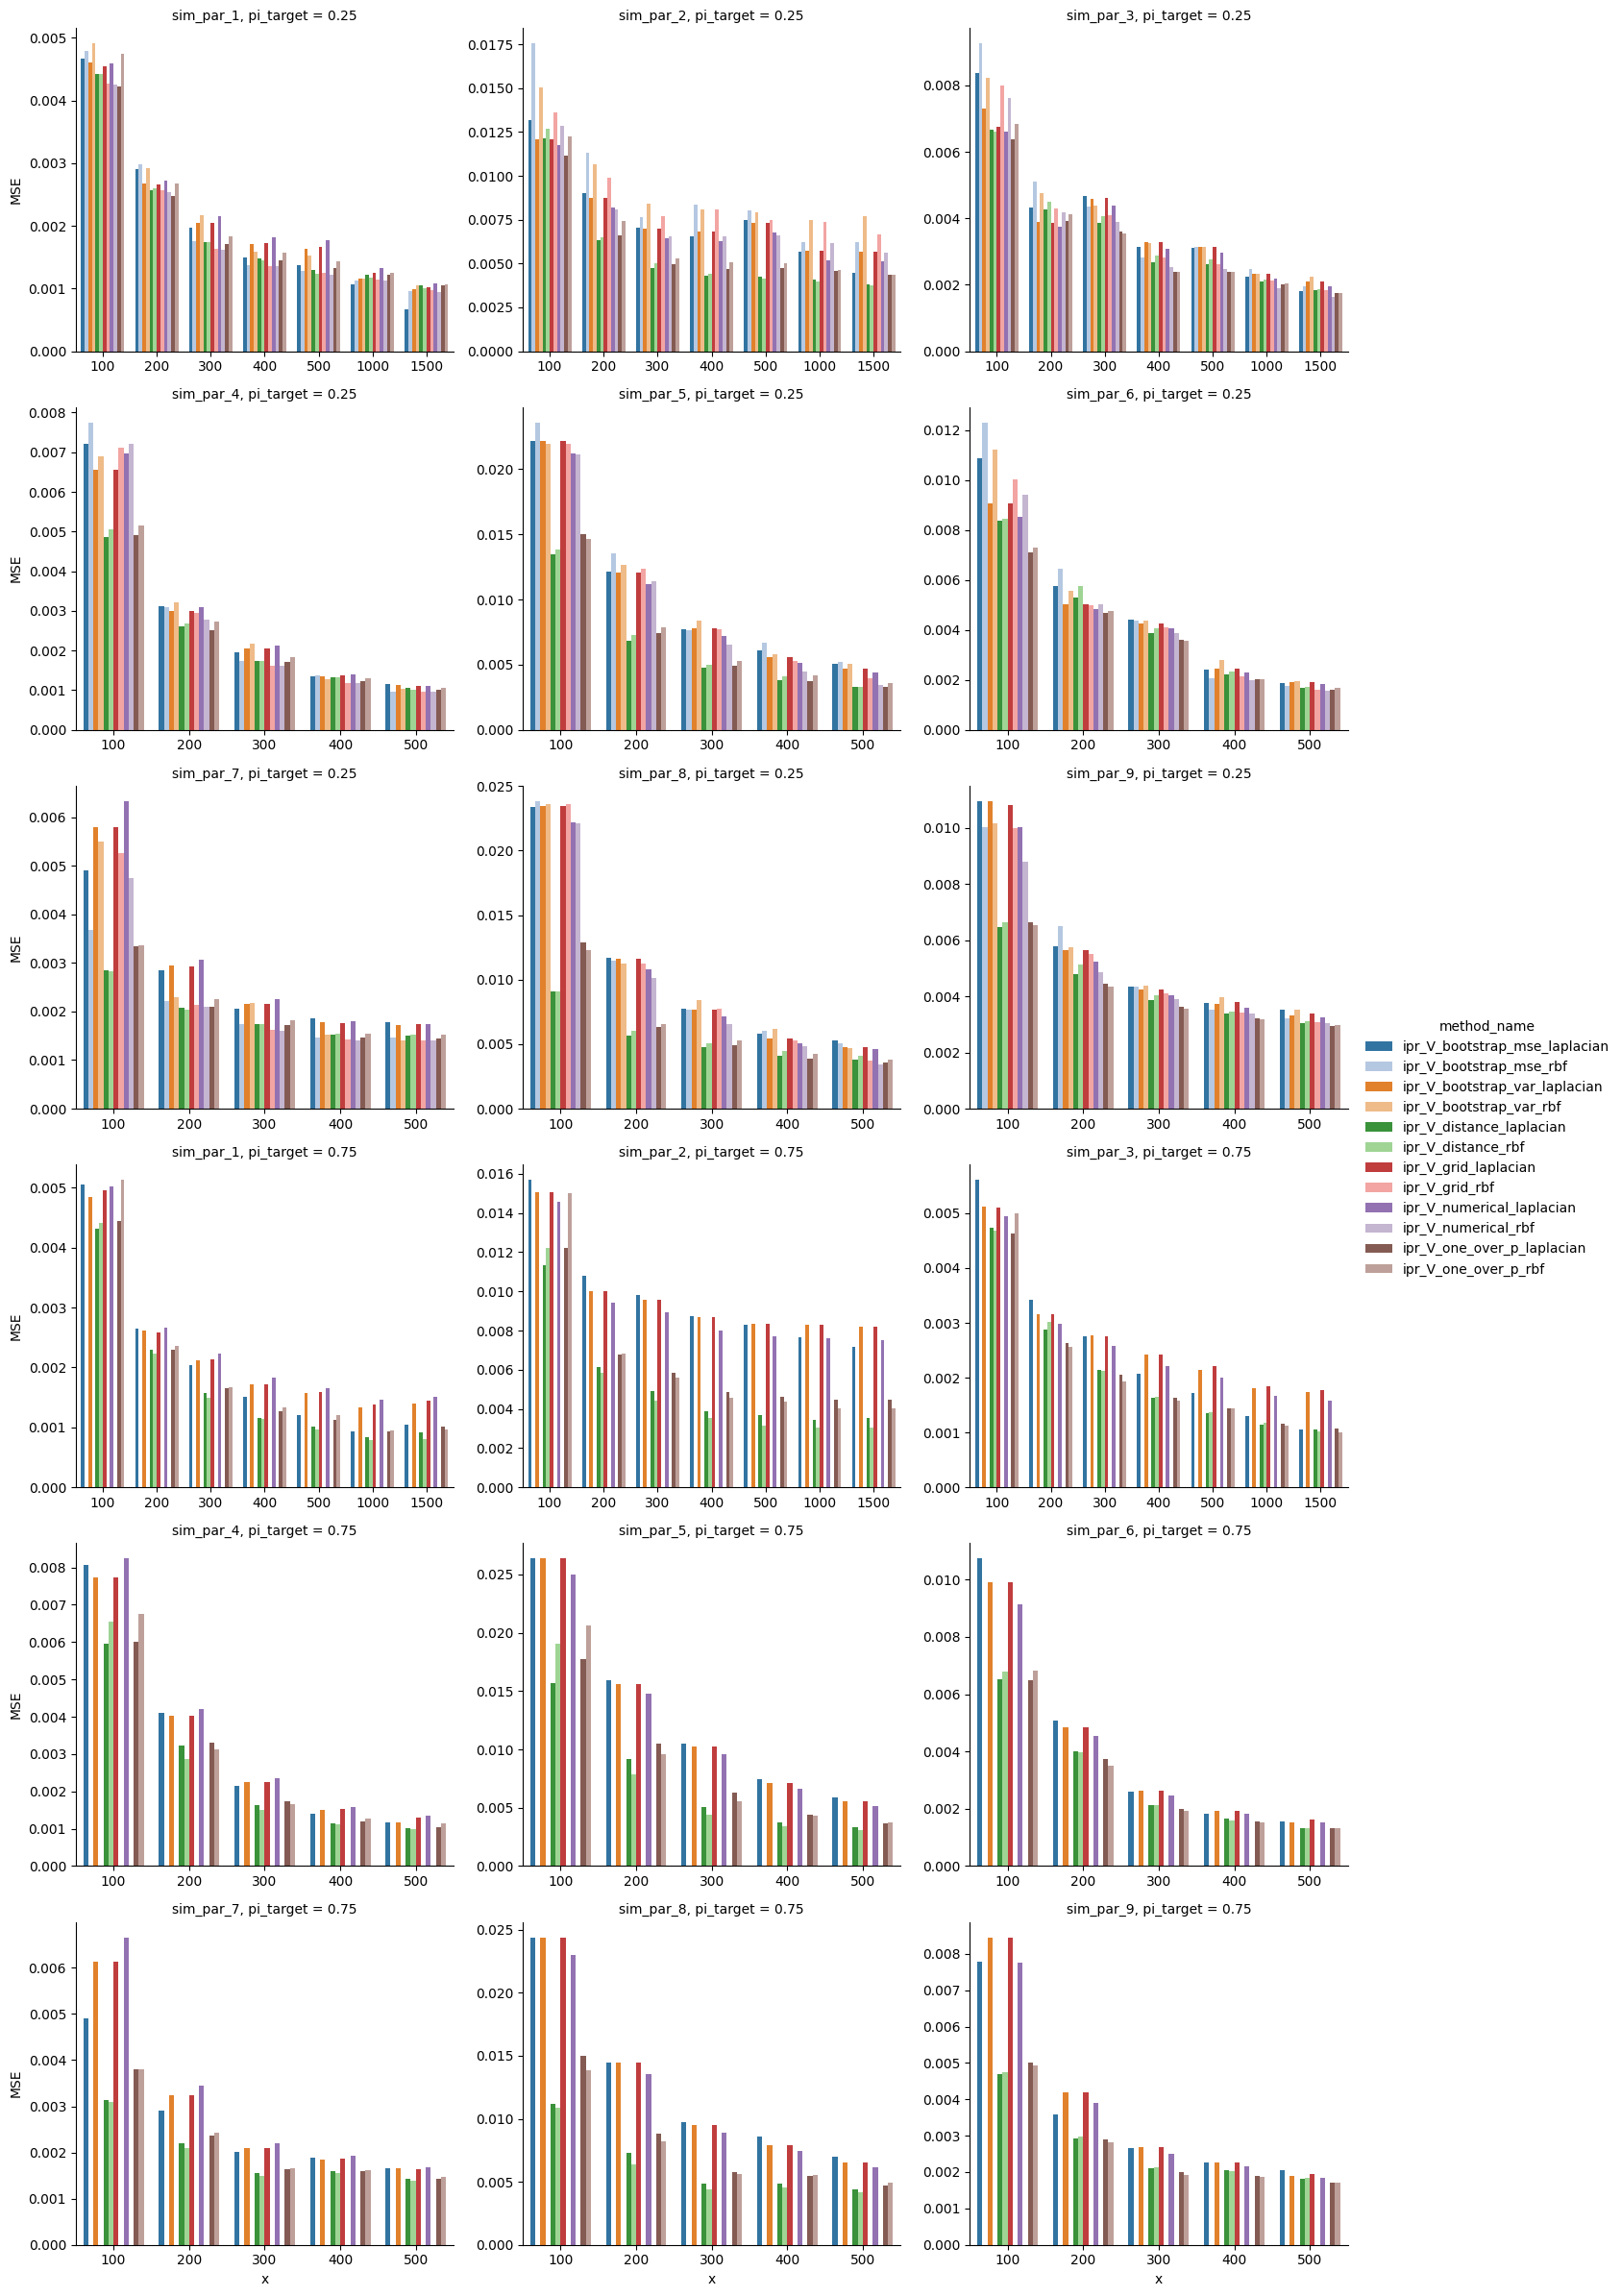

In [75]:
plot_mse(df_mse, ['V'], ['rbf', 'laplacian'], ['ipr'])

## Figure 5

In [128]:
df_mse_tmp = copy.copy(df_mse)
df_mse_tmp = df_mse_tmp.loc[df_mse_tmp['n_target'] <= 500,:]

In [131]:
df_mse_tmp['rank']=df_mse_tmp.groupby(['sim_scenario','n_plus','n_minus','n_target','pi_target']).rank(method='dense', ascending=True)['MSE']

In [133]:
df_mse_tmp[['method_name', 'rank']].groupby(['method_name']).agg('mean').reset_index().sort_values('rank').reset_index(drop=True)

,method_name,rank
0,ipr_U_numerical_rbf,5.466667
1,ipr_U_grid_rbf,5.800000
2,ipr_V_distance_rbf,8.277778
3,ipr_V_distance_laplacian,8.488889
4,ipr_V_one_over_p_laplacian,8.588889
5,ipr_V_numerical_rbf,8.622222
6,ipr_U_grid_laplacian,9.011111
7,ipr_U_numerical_laplacian,9.100000
8,ipr_U_one_over_p_laplacian,9.922222
9,ipr_V_one_over_p_rbf,10.377778


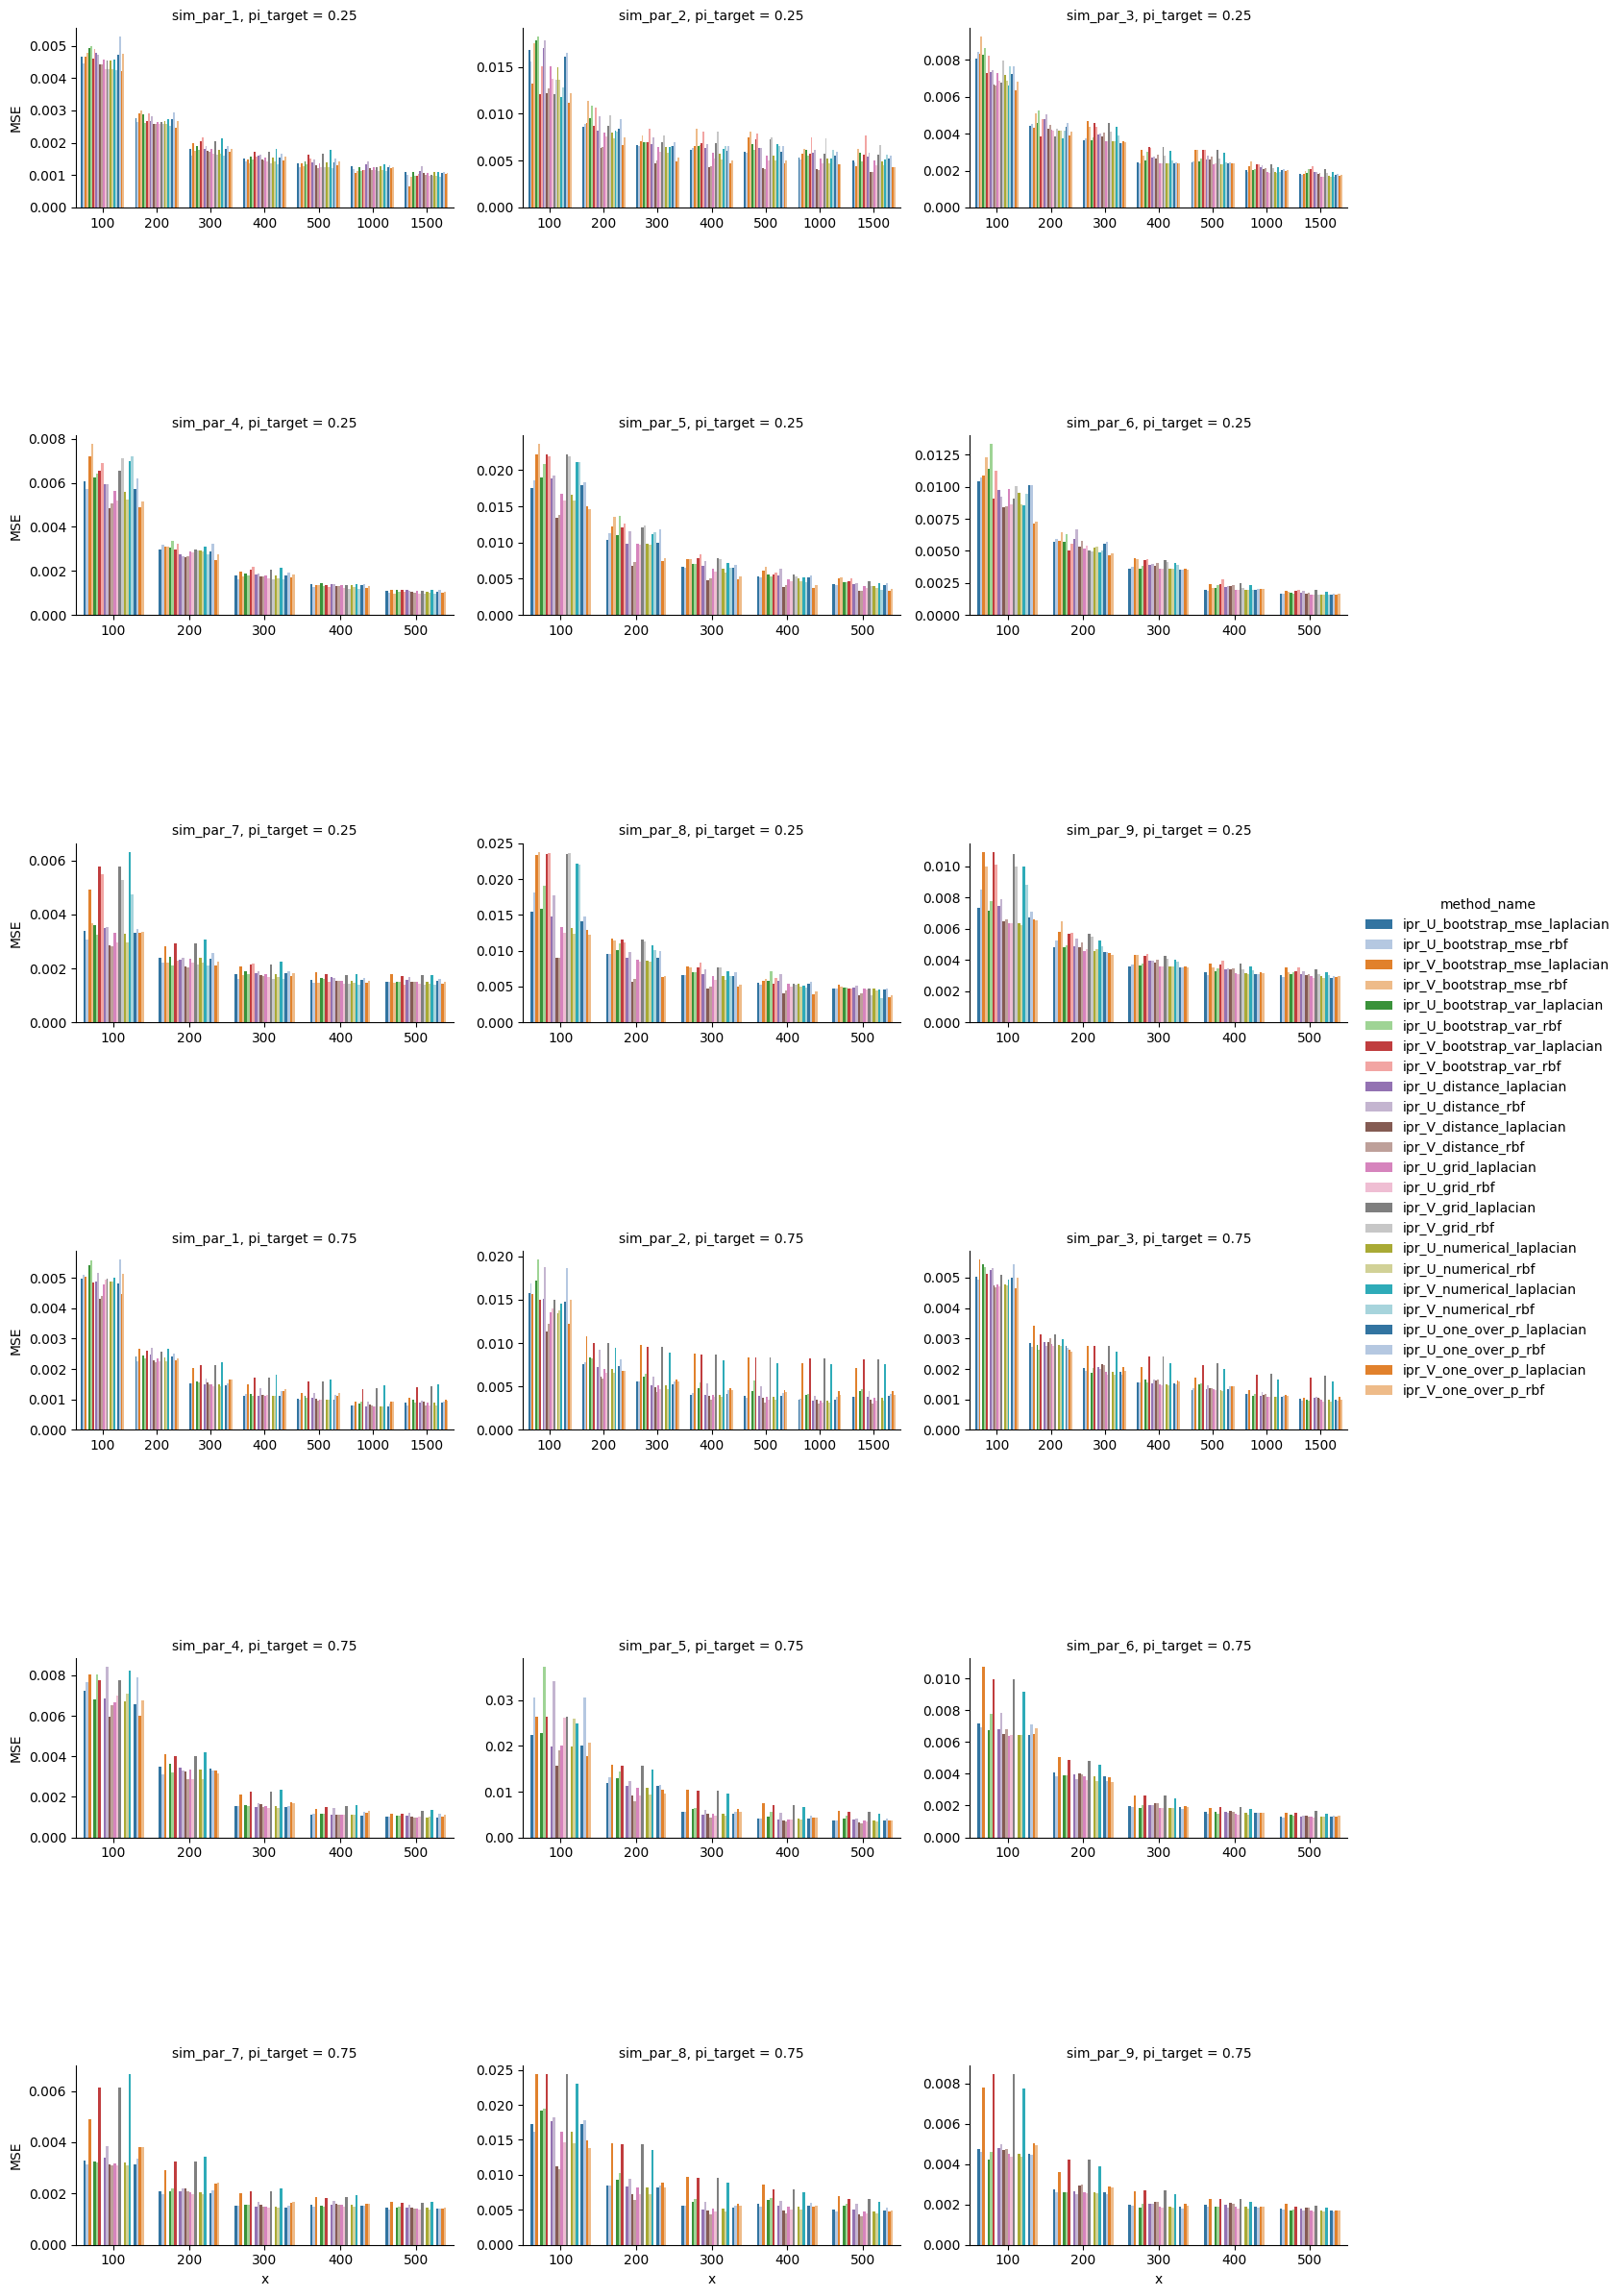

In [81]:
plot_mse(df_mse, ['U', 'V'], ['rbf', 'laplacian'], ['ipr'])

# TIME

In [28]:
df['log_time'] = np.log(df['time'])

In [29]:
df = df.sort_values(by=["pi_target", "sim_scenario"])
df['facet_blocks'] = df['sim_scenario'] + ", pi_target = " + df['pi_target'].astype(str)

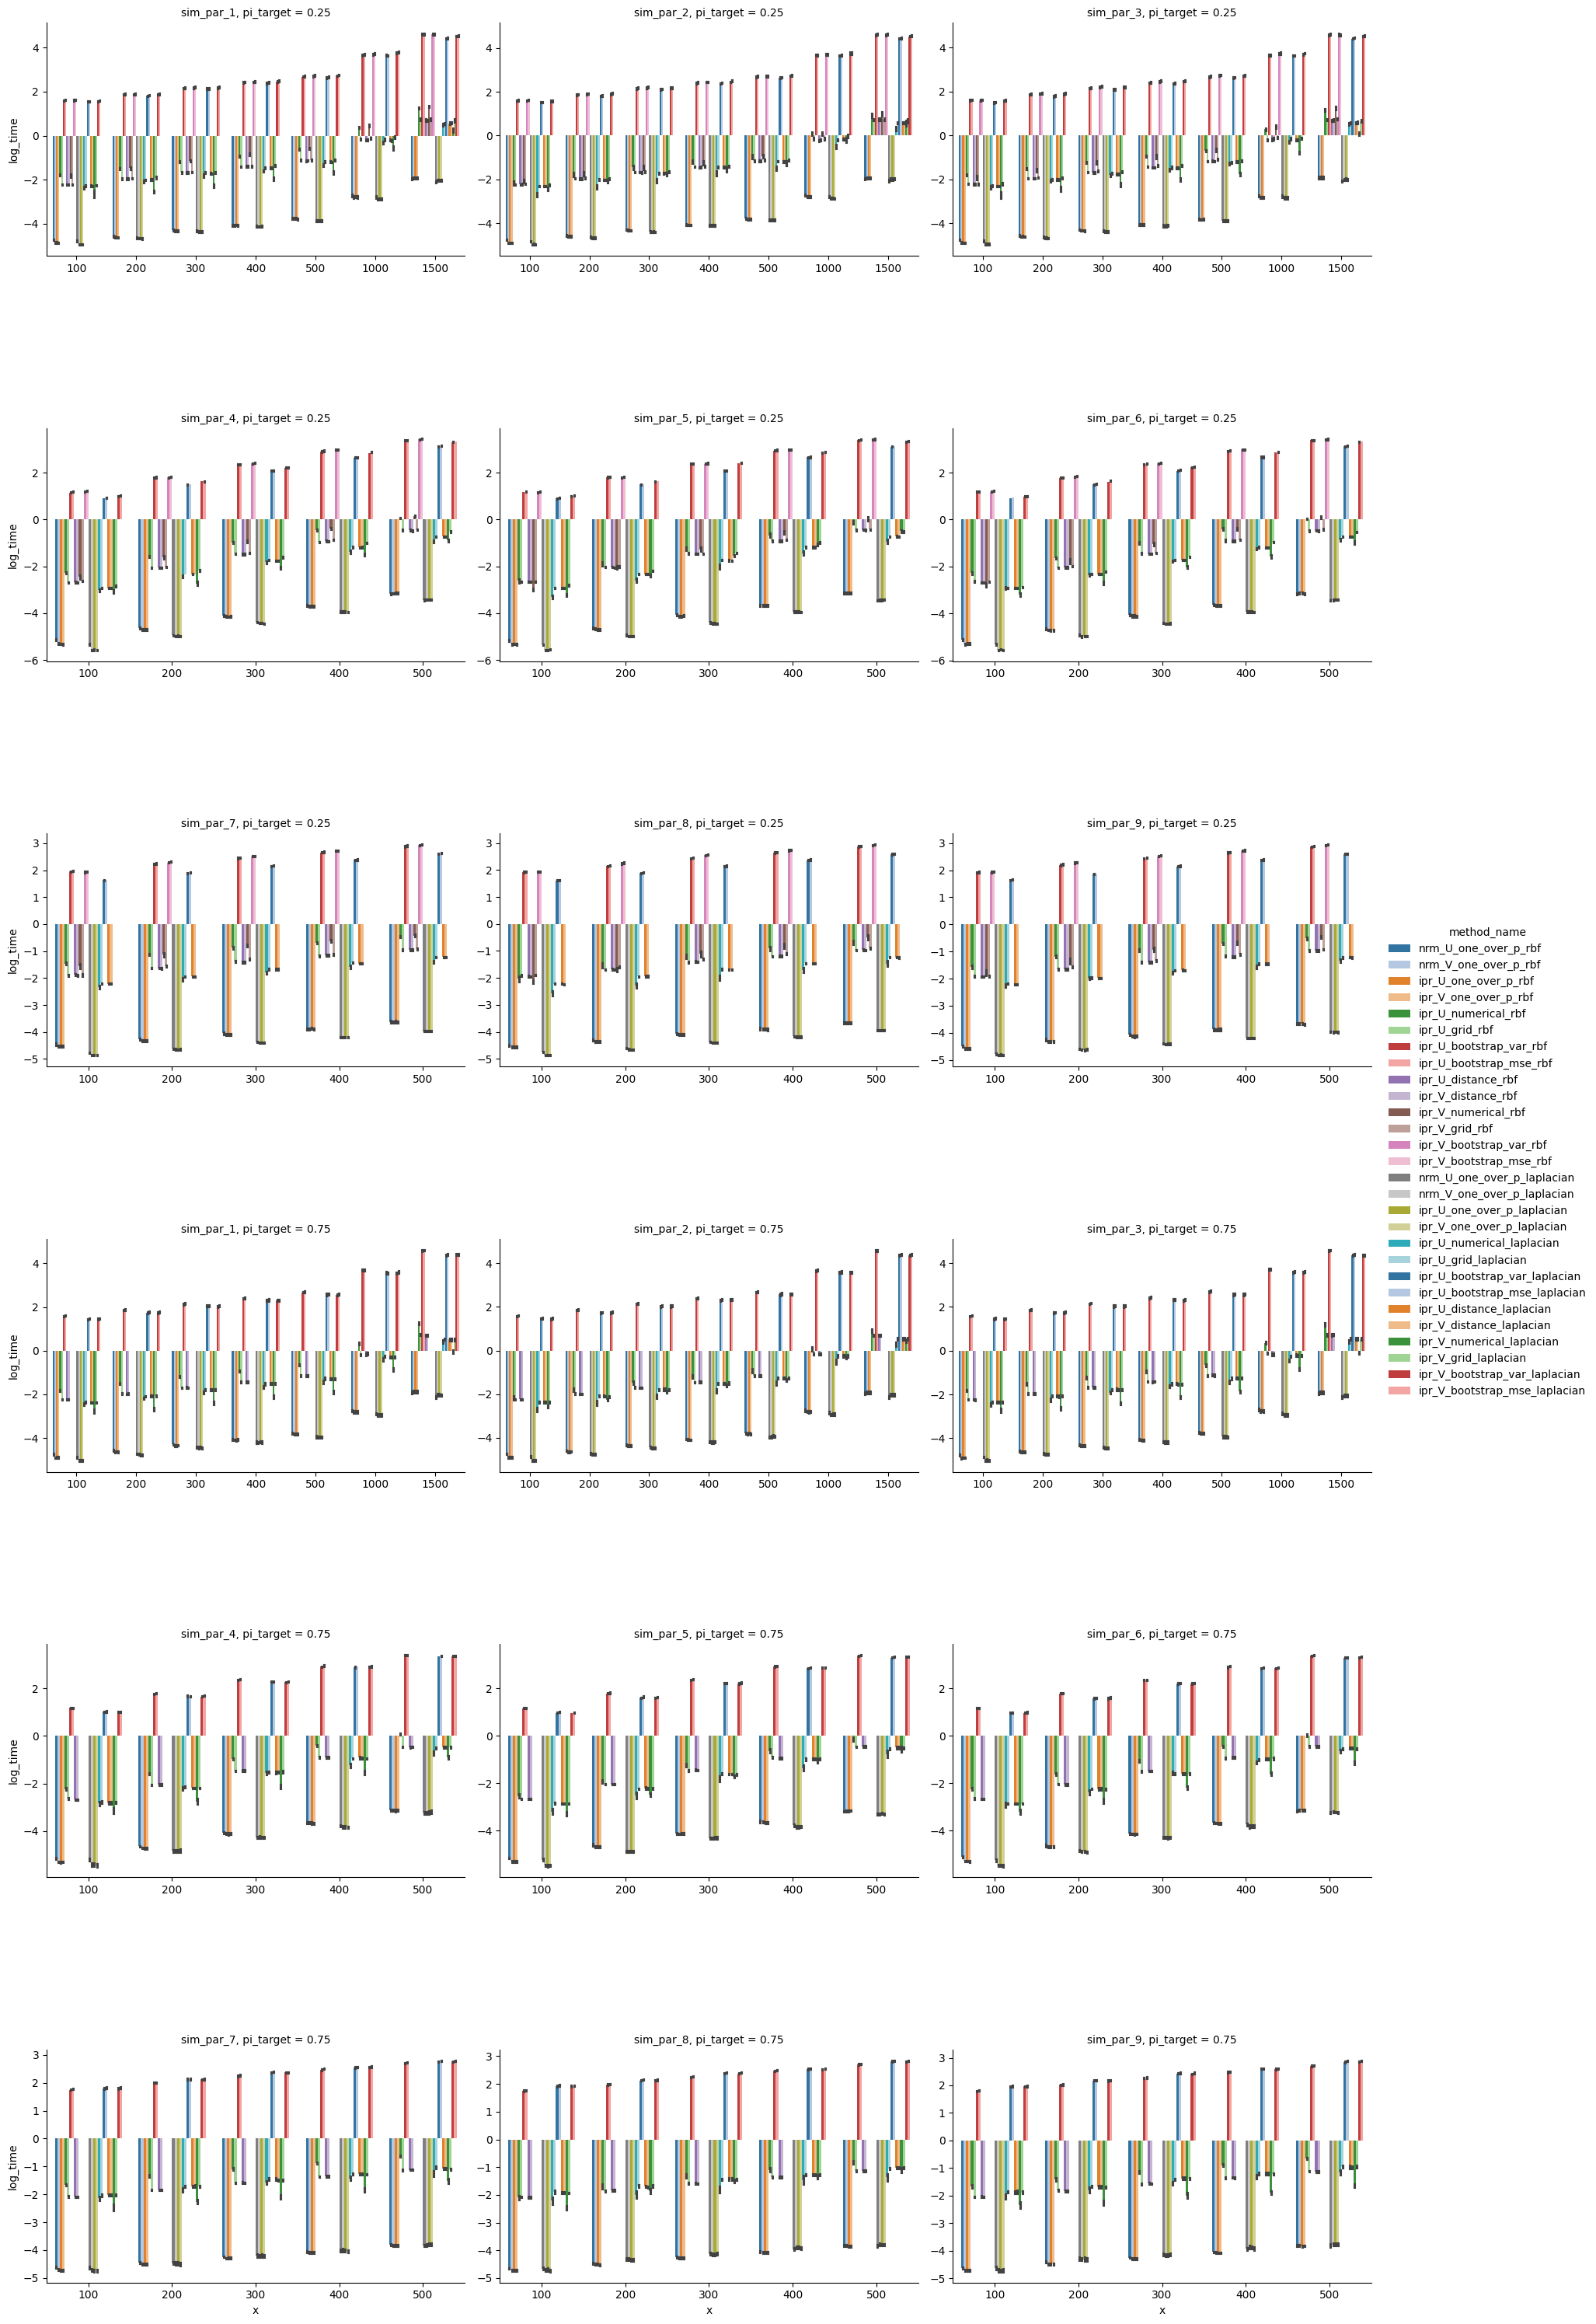

In [31]:
g = sns.catplot(data=df,
    x="x",  
    y="log_time",              
    hue="method_name",
    palette='tab20',
    col="facet_blocks",         
    kind="bar",
    # height=4,
    aspect=1.2,
    sharey=False,
    sharex=False,
    col_wrap=3
)
g.set_titles("{col_name}")
plt.show()

In [57]:
df.columns

Index(['sim_scenario', 'n_plus', 'n_minus', 'n_target', 'pi_target',
       'gamma_selection_name', 'estimator', 'type', 'kernel', 'x', 'x_name',
       'p', 'distributions', 'method_name', 'pi', 'var_n', 'var', 'gamma',
       'MSE', 'time', 'log_time', 'facet_blocks'],
      dtype='object')

In [58]:
df_time = df[(df['sim_scenario'] == 'sim_par_1') & (df['pi_target'] == 0.25)]

In [59]:
df_time = df_time[['time', 'gamma_selection_name', 'type', 'n_target', 'estimator', 'kernel']].groupby(['gamma_selection_name', 'type', 'n_target', 'estimator', 'kernel']).agg('mean').reset_index()

In [60]:
df_time['my_time'] = np.nan
df_time.loc[df_time['gamma_selection_name'] == 'one_over_p', 'my_time'] = 1
df_time.loc[df_time['gamma_selection_name'] == 'grid', 'my_time'] = 13 + 1
df_time.loc[df_time['gamma_selection_name'] == 'bootstrap_var', 'my_time'] = 13*50 + 1
df_time.loc[df_time['gamma_selection_name'] == 'bootstrap_mse', 'my_time'] = 13*50 + 13 + 1
df_time.loc[df_time['gamma_selection_name'] == 'distance', 'my_time'] = 13 + 1

In [ ]:
for i in range(len(df_time)):
    df_time['my_time'] = df_time['my_time']

In [50]:
df_time['my_time'] = df_time['my_time']*0.03903

In [51]:
df_time.loc[df_time['gamma_selection_name'] == 'one_over_p', 'time']

5    0.03903
Name: time, dtype: float64

<Axes: xlabel='my_time', ylabel='time'>

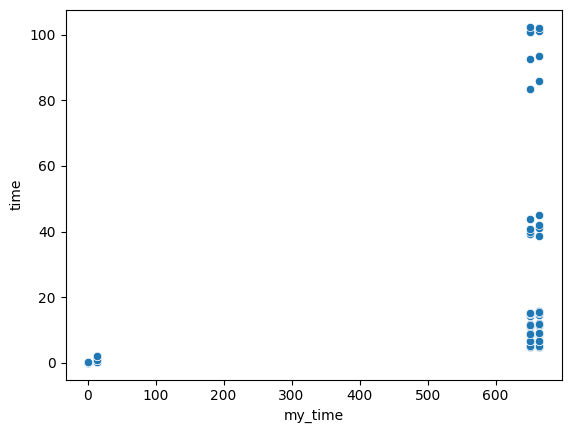

In [61]:
sns.scatterplot(df_time, x='my_time', y='time')